# Name: AYUSH CHAKRABORTY

# ID: 25PGAI0112

## Import Libraries

In [ ]:
import warnings

#Command to not show warnings
warnings.filterwarnings("ignore")

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.base import datetools
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from statsforecast import StatsForecast
from statsmodels.tsa.arima.model import ARIMA as sm_arima
from statsforecast.models import ARIMA as sf_arima, SeasonalNaive, AutoARIMA, RandomWalkWithDrift
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss, grangercausalitytests
from statsmodels.tsa.api import VAR
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.base import datetools
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsforecast import StatsForecast
from statsmodels.tsa.arima.model import ARIMA as sm_arima
from statsforecast.models import ARIMA as sf_arima, AutoARIMA, SeasonalNaive, RandomWalkWithDrift
from prophet import Prophet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Q2. Using the stocks.csv dataset, answer the following questions.

### Loading Dataset

In [ ]:
#Import dataset
df = pd.read_csv('stocks.csv')
df.set_index('Date', inplace = True)
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93612 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    93587 non-null  float64
 1   High    93602 non-null  float64
 2   Low     93592 non-null  float64
 3   Close   93612 non-null  float64
 4   Volume  93612 non-null  int64  
 5   Name    93612 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.0+ MB


In [ ]:
df.tail()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA
2017-12-28,70.12,70.32,69.51,69.82,7556877,AABA
2017-12-29,69.79,70.13,69.43,69.85,6613070,AABA


### a. Apply a Box-Cox transformation for the trading volume of Apple stock (Ticker: AAPL) using the most appropriate λ value and visualize the transformed series. (10 marks)

In [ ]:
# Extract the trading volume for Apple (AAPL)
aapl_volume = df[df['Name'] == 'AAPL']['Volume']
aapl_volume.head(2)

Date
2006-01-03    201853036
2006-01-04    155225609
Name: Volume, dtype: int64

#### Find out optimal lambda

In [ ]:
#The boxcox function returns two values, (i) the transformed data and (ii) the optimal lambda
y_boxcox, lamda = boxcox(aapl_volume)
print(f"The optimal lambda for Box-Cox transformation is: {lamda}")

The optimal lambda for Box-Cox transformation is: 0.13044212847998668


#### Plotting the Graph

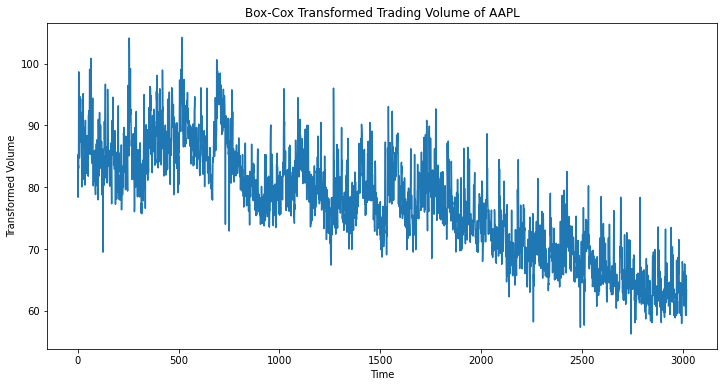

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_boxcox)
plt.title('Box-Cox Transformed Trading Volume of AAPL')
plt.xlabel('Time')
plt.ylabel('Transformed Volume')
plt.show()


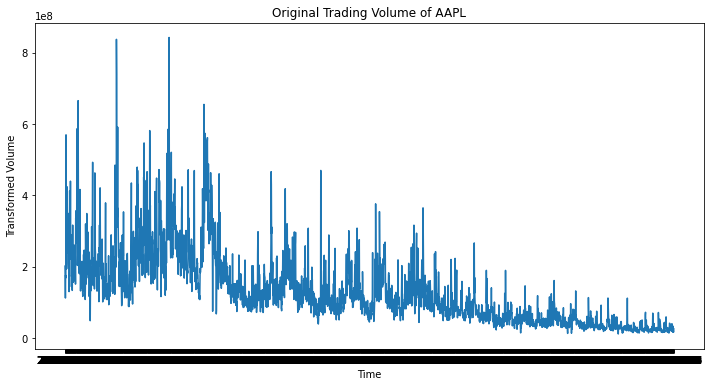

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(aapl_volume)
plt.title('Original Trading Volume of AAPL')
plt.xlabel('Time')
plt.ylabel('Transformed Volume')
plt.show()



### b. Test whether the high price of Google stock (Ticker: GOOG) is stationary using Augmented Dickey Fuller test, and make stationary using appropriate differencing. Test again to confirm that the time series has become stationary. (10 marks)

In [ ]:
# Extract the trading volume for Apple (AAPL)
goog_highprice = df[df['Name'] == 'GOOGL']['High']
goog_highprice.head(2)

Date
2006-01-03    218.05
2006-01-04    224.70
Name: High, dtype: float64

#### Augmented Dickey Fuller Test

In [ ]:
#Augmented Dickey Fuller test
adftest = adfuller(goog_highprice)
adf_stat = adftest[0]
adf_pval = adftest[1]
#Check result
print("stat = %f, pval = %f" % (adf_stat, adf_pval))
#Final result
if adf_pval > 0.05:
    print("The time series is not stationary at a 5% significance level")
else:
    print("The time series is stationary at a 5% significance level")

stat = 1.151646, pval = 0.995634
The time series is not stationary at a 5% significance level


#### Differencing

In [ ]:
goog_high_diff = goog_highprice.diff().dropna()

In [ ]:
#Augmented Dickey Fuller test after differencing
adftest = adfuller(goog_high_diff)
adf_stat = adftest[0]
adf_pval = adftest[1]
#Check result
print("stat = %f, pval = %f" % (adf_stat, adf_pval))
#Final result
if adf_pval > 0.05:
    print("The time series is not stationary at a 5% significance level")
else:
    print("The time series is stationary at a 5% significance level")

stat = -37.892407, pval = 0.000000
The time series is stationary at a 5% significance level


<AxesSubplot:xlabel='Date'>

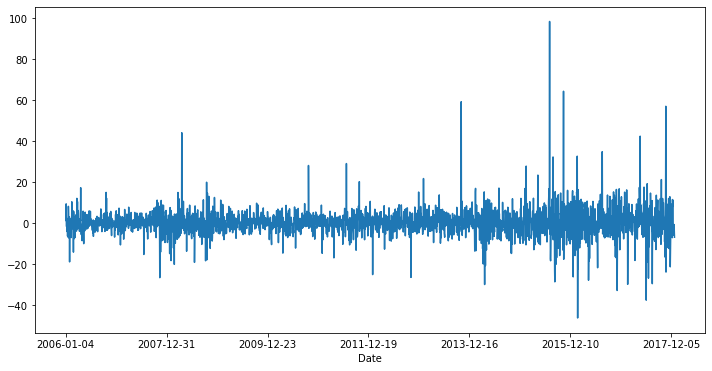

In [ ]:
plt.figure(figsize=(12, 6))
goog_high_diff.plot()

## Q6. Implement the below multivariate forecasting methods for the high prices of 4 companies using stock.csv Apple (Ticker: AAPL), Google (Ticker: GOOG), Amazon (Ticker: AMZN) and Microsoft (Ticker: MSFT). The goal is to accurately forecast Apple high prices for December ’17.

### (i) ARIMAX model using Nixtla’s AutoARIMA method (10 marks)

### Method - I : Using 'Open', 'High', 'Low', 'Close' as Exogenous and Predicting APPLE HIGH

In [ ]:
data = df[df['Name'] == 'AAPL'][['Open', 'High', 'Low', 'Close','Name']]
data.head()

,Open,High,Low,Close,Name
Date,,,,,
2006-01-03,10.34,10.68,10.32,10.68,AAPL
2006-01-04,10.73,10.85,10.64,10.71,AAPL
2006-01-05,10.69,10.70,10.54,10.63,AAPL
2006-01-06,10.75,10.96,10.65,10.90,AAPL
2006-01-09,10.96,11.03,10.82,10.86,AAPL


In [ ]:
# Train-test split using index locations
split_date = '2017-11-30'
start_date = '2017-12-01'
train = data.loc[:split_date]
test = data.loc[start_date:]


In [ ]:
#Simple data preprocessing for Nixtla
df_nix = train[['High','Open', 'Low', 'Close']].reset_index()
df_nix["unique_id"] = 1
df_nix.columns = ['ds','y','Open','Low', 'Close','unique_id']
df_nix.head()

,ds,y,Open,Low,Close,unique_id
0,2006-01-03,10.68,10.34,10.32,10.68,1
1,2006-01-04,10.85,10.73,10.64,10.71,1
2,2006-01-05,10.70,10.69,10.54,10.63,1
3,2006-01-06,10.96,10.75,10.65,10.90,1
4,2006-01-09,11.03,10.96,10.82,10.86,1


In [ ]:
# Define the models
models = [AutoARIMA()]

# Train the StatsForecast model
sf = StatsForecast(df=df_nix, models=models, freq='D', n_jobs=-1)

sf.fit(df_nix)
#Access dictionary of the AutoARIMA model's parameters
model_params = sf.fitted_[0][0].model_
model_params

{'coef': {'ar1': -0.2302858729966047,
  'ma1': -0.6061346166019619,
  'ma2': -0.3509846381255248,
  'ex_1': 0.6581000089053256,
  'ex_2': -0.34780667487434946,
  'ex_3': 0.6863224602554183},
 'sigma2': 0.13082215098576933,
 'var_coef': array([[ 1.51598080e-05, -2.79908769e-05,  7.65419787e-06,
         -2.47811194e-06,  6.95024158e-07,  5.60485281e-06],
        [-2.79908769e-05,  5.46733644e-05, -8.48669464e-06,
          9.59079587e-06, -4.22187182e-06, -1.48994339e-05],
        [ 7.65419787e-06, -8.48669464e-06,  2.79292529e-05,
          1.60030574e-05, -5.77439211e-06, -1.03282710e-05],
        [-2.47811194e-06,  9.59079587e-06,  1.60030574e-05,
          1.33382677e-05, -5.37660356e-06, -1.11996325e-05],
        [ 6.95024158e-07, -4.22187182e-06, -5.77439211e-06,
         -5.37660356e-06,  2.94414791e-06,  4.92477992e-06],
        [ 5.60485281e-06, -1.48994339e-05, -1.03282710e-05,
         -1.11996325e-05,  4.92477992e-06,  1.05523803e-05]]),
 'mask': array([ True,  True,  True, 

In [ ]:
def forecast_exog(exog_var_name, horizon):
    exog_df = df_nix[exog_var_name].reset_index()
    exog_df.columns = ["ds","y"]
    exog_df["unique_id"] = 1

    #Get forecast of realcons exogenous variable for next 4 quarters using a Drift method
    models = [RandomWalkWithDrift(alias="Drift")]
    sf_exog = StatsForecast(df=exog_df,
                       models=models,
                       freq='D', # Daily
                       n_jobs=-1)

    forecasted_exog = sf_exog.forecast(horizon)["Drift"].values
    return(forecasted_exog)

In [ ]:
df_nix.set_index('ds',inplace = True)
# Generate a date range from 2017-12-01 to 2017-12-31
date_range = pd.date_range(start='2017-12-01', end='2017-12-31')
forecasted_exog_df = pd.DataFrame({'ds': test.index})
#forecasted_exog_df = pd.DataFrame({'ds': date_range})
forecasted_exog_df['Open'] = forecast_exog('Open',20)
forecasted_exog_df['Low'] = forecast_exog('Low',20)
forecasted_exog_df['Close'] = forecast_exog('Close',20)
forecasted_exog_df["unique_id"] = 1
forecasted_exog_df['ds'] = pd.to_datetime(forecasted_exog_df['ds'])
forecasted_exog_df.head()


,ds,Open,Low,Close,unique_id
0,2017-12-01,170.483398,168.492737,171.903763,1
1,2017-12-04,170.536789,168.545486,171.957520,1
2,2017-12-05,170.590195,168.598221,172.011276,1
3,2017-12-06,170.643585,168.650970,172.065048,1
4,2017-12-07,170.696991,168.703705,172.118805,1


In [ ]:
#Get forecast
arima_forecast = sf.forecast(h=20, X_df = forecasted_exog_df, level = [95,90])
arima_forecast.head()

,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-lo-90,AutoARIMA-hi-90,AutoARIMA-hi-95
unique_id,,,,,,
1,2017-12-01,172.628906,171.919998,172.033981,173.223846,173.337814
1,2017-12-02,172.760498,172.042175,172.157669,173.363342,173.478836
1,2017-12-03,172.796265,172.077927,172.193420,173.399109,173.514603
1,2017-12-04,172.854095,172.135147,172.250732,173.457443,173.573029
1,2017-12-05,172.906830,172.187500,172.303146,173.510513,173.626175


In [ ]:

mape_arimax = mean_absolute_percentage_error(test['High'], arima_forecast['AutoARIMA'])
print(f'MAPE for ARIMAX model: {mape_arimax * 100:.2f}%')


MAPE for ARIMAX model: 0.98%


### Method  - 2 Using 'GOOGL', 'AMZN', 'MSFT' HIGHs as Exogenous and Predicting APPLE High

In [ ]:
# Filter the data for the relevant columns and tickers
data = df
tickers = ['AAPL', 'GOOGL', 'AMZN', 'MSFT']
data = data[data['Name'].isin(tickers)]

# Pivot the data to have a separate column for each ticker's high prices
data_pivoted = data.pivot(columns='Name', values='High')

# Rename columns for convenience
data_pivoted.columns = ['AAPL_high', 'GOOG_high', 'AMZN_high', 'MSFT_high']

data_pivoted.head()

,AAPL_high,GOOG_high,AMZN_high,MSFT_high
Date,,,,
2006-01-03,10.68,47.85,218.05,27.00
2006-01-04,10.85,47.73,224.70,27.08
2006-01-05,10.70,48.20,226.00,27.13
2006-01-06,10.96,48.58,235.49,27.00
2006-01-09,11.03,47.10,236.94,27.07


In [ ]:
data = data_pivoted
# Train-test split using index locations
split_date = '2017-11-30'
start_date = '2017-12-01'
train = data.loc[:split_date]
test = data.loc[start_date:]


In [ ]:
#Simple data preprocessing for Nixtla
df_nix = train[['AAPL_high', 'GOOG_high', 'AMZN_high', 'MSFT_high']].reset_index()
df_nix["unique_id"] = 1
df_nix.columns = ['ds','y', 'GOOG_high', 'AMZN_high', 'MSFT_high','unique_id']
df_nix.head()

,ds,y,GOOG_high,AMZN_high,MSFT_high,unique_id
0,2006-01-03,10.68,47.85,218.05,27.00,1
1,2006-01-04,10.85,47.73,224.70,27.08,1
2,2006-01-05,10.70,48.20,226.00,27.13,1
3,2006-01-06,10.96,48.58,235.49,27.00,1
4,2006-01-09,11.03,47.10,236.94,27.07,1


In [ ]:
# Define the models
models = [AutoARIMA()]

# Train the StatsForecast model
sf = StatsForecast(df=df_nix, models=models, freq='D', n_jobs=-1)

sf.fit(df_nix)
#Access dictionary of the AutoARIMA model's parameters
model_params = sf.fitted_[0][0].model_
model_params

{'coef': {'ar1': 0.09453448339368789,
  'ar2': -0.059222815455940124,
  'ex_1': 0.02046212294461941,
  'ex_2': 0.03132791237959927,
  'ex_3': 0.26580993425316257},
 'sigma2': 0.8969848095951107,
 'var_coef': array([[ 3.68229761e-04,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [-6.07351853e-05,  3.31259033e-04,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  3.33555704e-04,
          9.45676520e-21, -8.87555405e-22],
        [ 0.00000000e+00,  0.00000000e+00,  7.05843964e-22,
          3.33555704e-04, -4.44633361e-21],
        [ 0.00000000e+00,  0.00000000e+00,  9.02381133e-22,
         -2.68308224e-21,  3.33555704e-04]]),
 'mask': array([ True,  True,  True,  True,  True]),
 'loglik': -4088.517326014524,
 'aic': 8189.034652029048,
 'arma': (2, 0, 0, 0, 1, 1, 0),
 'residuals': array([-0.00430703, -0.05681165, -0.20816854, ..., -0.4104515 ,
        -1.06982491,  0.18174165]),
 'code': 2,
 '

In [ ]:
def forecast_exog(exog_var_name, horizon):
    exog_df = df_nix[exog_var_name].reset_index()
    exog_df.columns = ["ds","y"]
    exog_df["unique_id"] = 1

    #Get forecast of realcons exogenous variable for next 4 quarters using a Drift method
    models = [RandomWalkWithDrift(alias="Drift")]
    sf_exog = StatsForecast(df=exog_df,
                       models=models,
                       freq='D', # Daily
                       n_jobs=-1)

    forecasted_exog = sf_exog.forecast(horizon)["Drift"].values
    return(forecasted_exog)

In [ ]:
df_nix.columns

Index(['ds', 'y', 'GOOG_high', 'AMZN_high', 'MSFT_high', 'unique_id'], dtype='object')

In [ ]:
df_nix.set_index('ds',inplace = True)
# Generate a date range from 2017-12-01 to 2017-12-31
date_range = pd.date_range(start='2017-12-01', end='2017-12-31')
forecasted_exog_df = pd.DataFrame({'ds': test.index})
forecasted_exog_df['GOOG_high'] = forecast_exog('GOOG_high',20)
forecasted_exog_df['AMZN_high'] = forecast_exog('AMZN_high',20)
forecasted_exog_df['MSFT_high'] = forecast_exog('MSFT_high',20)
forecasted_exog_df["unique_id"] = 1
forecasted_exog_df['ds'] = pd.to_datetime(forecasted_exog_df['ds'])
forecasted_exog_df.head()


,ds,GOOG_high,AMZN_high,MSFT_high,unique_id
0,2017-12-01,1178.947144,1044.415527,84.539185,1
1,2017-12-04,1179.324219,1044.691162,84.558372,1
2,2017-12-05,1179.701416,1044.966675,84.577553,1
3,2017-12-06,1180.078613,1045.242188,84.596741,1
4,2017-12-07,1180.455688,1045.517700,84.615929,1


In [ ]:
#Get forecast
arima_forecast = sf.forecast(h=20, X_df = forecasted_exog_df, level = [95,90])
arima_forecast.head()

,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-lo-90,AutoARIMA-hi-90,AutoARIMA-hi-95
unique_id,,,,,,
1,2017-12-01,172.233612,170.377335,170.675781,173.791428,174.089874
1,2017-12-02,172.254959,169.502914,169.945374,174.564545,175.007004
1,2017-12-03,172.272125,168.905945,169.447144,175.097107,175.638306
1,2017-12-04,172.293182,168.418335,169.041306,175.545059,176.168030
1,2017-12-05,172.314850,167.989105,168.684570,175.945114,176.640579


### MAPE Result

In [ ]:
mape_arimax = mean_absolute_percentage_error(test['AAPL_high'], arima_forecast['AutoARIMA'])
print(f'MAPE for ARIMAX model: {mape_arimax * 100:.2f}%')


MAPE for ARIMAX model: 0.97%



### (ii) Vector Autoregression (10 marks)

In [ ]:
data = data_pivoted
# Train-test split using index locations
split_date = '2017-11-30'
start_date = '2017-12-01'
train = data.loc[:split_date]
test = data.loc[start_date:]


In [ ]:
df = train

### Checking Stationarity

In [ ]:
def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    return result[1] > 0.05  # If p-value > 0.05, the series is non-stationary

# Check stationarity and difference if needed
for column in df.columns:
    if check_stationarity(df[column]):
        df[column] = df[column].diff().dropna()


ADF Statistic: 0.8666903851471983
p-value: 0.992639859985009
ADF Statistic: 3.0100109063253533
p-value: 1.0
ADF Statistic: 1.1419006323205965
p-value: 0.9955588302598822
ADF Statistic: 2.0660764109042487
p-value: 0.9987528941026637


### Stationary After Differencing

In [ ]:
df.dropna(inplace = True)
for column in df.columns:
    check_stationarity(df[column])

ADF Statistic: -17.079745392270983
p-value: 7.721752149570396e-30
ADF Statistic: -9.857597228912539
p-value: 4.3178075888346405e-17
ADF Statistic: -37.836473450187555
p-value: 0.0
ADF Statistic: -16.707308554760694
p-value: 1.4443938329573098e-29


#### Lags Period

In [ ]:
var_model = VAR(df)
for i in range(1,10):
    result = var_model.fit(i)
    print('Lag =', i)
    print('AIC : ', result.aic)

Lag = 1
AIC :  5.442005890565341
Lag = 2
AIC :  5.434884020574795
Lag = 3
AIC :  5.433685521067194
Lag = 4
AIC :  5.43697274410802
Lag = 5
AIC :  5.4191886097789865
Lag = 6
AIC :  5.422049050565172
Lag = 7
AIC :  5.42621441293653
Lag = 8
AIC :  5.429549427240073
Lag = 9
AIC :  5.433208643529191


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
#Alternative method for Lags
var_model.select_order(40).summary()

,AIC,BIC,FPE,HQIC
0,5.491,5.499*,242.5,5.494
1,5.473,5.514,238.3,5.488*
2,5.465,5.538,236.2,5.491
3,5.463,5.569,235.8,5.501
4,5.465,5.603,236.3,5.515
5,5.446*,5.616,231.8*,5.507
6,5.448,5.650,232.2,5.521
7,5.451,5.686,232.9,5.535
8,5.453,5.720,233.4,5.549
9,5.455,5.755,234.0,5.563


In [ ]:
var_model = VAR(df).fit(5)

#Model summary
var_model.summary()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 19, Jun, 2024
Time:                     20:07:57
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    5.58769
Nobs:                     2993.00    HQIC:                   5.47981
Log likelihood:          -25013.3    FPE:                    225.696
AIC:                      5.41919    Det(Omega_mle):         219.471
--------------------------------------------------------------------
Results for equation AAPL_high
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.044305         0.018691            2.370           0.018
L1.AAPL_high         0.099653         0.019628            5.077           0.000
L1.GOOG_high         0.002474         0.003420            0.

### Residual Analysis

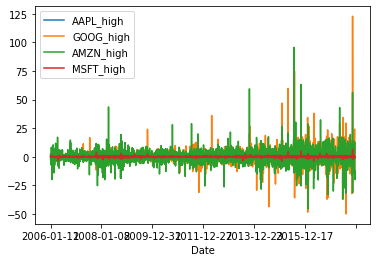

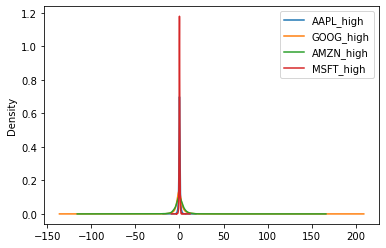

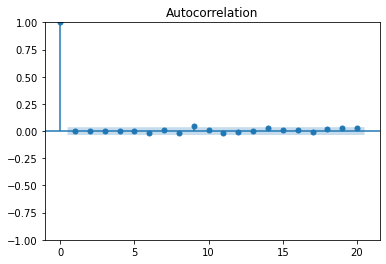

In [ ]:
#Residual analysis
residuals = pd.DataFrame(var_model.resid)
residuals.plot()
plt.show()

# Density plot of residuals
residuals.plot(kind='kde')
plt.show()

#Plot Autocorrelation of Residuals
plot_acf(residuals["AAPL_high"], lags=20)
plt.show()

In [ ]:
#Check
lag_order = 5
var_forecast = var_model.forecast(df.values,20)
var_forecast

array([[ 0.1079968 , -0.44113913, -0.59707831, -0.11967646],
       [ 0.33340307,  1.73759997,  1.65689236,  0.12304555],
       [ 0.11162418,  1.05127134,  0.07009807,  0.02224609],
       [-0.01288875, -1.1071236 ,  0.92776851,  0.01083428],
       [-0.06057187, -1.07536719,  0.42837449, -0.01603771],
       [ 0.02836056,  0.38895025,  0.3260343 ,  0.02371345],
       [ 0.07800253,  0.54160669,  0.21831894,  0.011676  ],
       [ 0.07340889,  0.40446008,  0.24537299,  0.01411689],
       [ 0.04503487,  0.45396892,  0.22803588,  0.01760847],
       [ 0.03699723,  0.41828975,  0.25645878,  0.01932752],
       [ 0.05321154,  0.37876983,  0.26210273,  0.01972274],
       [ 0.0556327 ,  0.38367527,  0.27217517,  0.02017601],
       [ 0.05284036,  0.37500431,  0.27356286,  0.01920989],
       [ 0.05296879,  0.37045671,  0.27193711,  0.01909929],
       [ 0.05386697,  0.37564478,  0.27381887,  0.01943248],
       [ 0.05383578,  0.3757444 ,  0.27187247,  0.01920507],
       [ 0.05377761,  0.

In [ ]:
train = data.loc[:split_date]
#Invert differencing and get final forecast
var_forecast_inv_diff = train.loc["2017-11-30","AAPL_high"] + var_forecast[0]
(var_forecast_inv_diff)

for i in range(1,20):
    var_forecast_inv_diff = var_forecast_inv_diff  + var_forecast[i]
    print(var_forecast_inv_diff)

[172.58139987 173.43646085 173.19981405 172.14336909]
[172.69302405 174.48773219 173.26991212 172.16561518]
[172.68013529 173.38060859 174.19768063 172.17644947]
[172.61956342 172.3052414  174.62605512 172.16041176]
[172.64792398 172.69419165 174.95208942 172.18412521]
[172.72592651 173.23579834 175.17040836 172.19580121]
[172.7993354  173.64025842 175.41578135 172.2099181 ]
[172.84437027 174.09422734 175.64381723 172.22752657]
[172.88136751 174.51251709 175.90027602 172.24685409]
[172.93457904 174.89128692 176.16237875 172.26657683]
[172.99021174 175.27496219 176.43455392 172.28675284]
[173.0430521  175.6499665  176.70811678 172.30596273]
[173.09602089 176.02042321 176.98005388 172.32506202]
[173.14988786 176.39606799 177.25387276 172.3444945 ]
[173.20372364 176.7718124  177.52574523 172.36369957]
[173.25750126 177.1474981  177.79596452 172.38279506]
[173.31116308 177.52487026 178.06657505 172.4019679 ]
[173.36479381 177.90218373 178.33736407 172.42116006]
[173.41847834 178.27930023 1

In [ ]:
var_forecast_inv_diff = train.loc["2017-11-30","AAPL_high"] + var_forecast[0]
forecast_values = [var_forecast_inv_diff]

for i in range(1, 20):
    var_forecast_inv_diff = var_forecast_inv_diff + var_forecast[i]
    forecast_values.append(var_forecast_inv_diff)

forcasted_df = pd.DataFrame(forecast_values, columns = ['AAPL_high', 'GOOG_high', 'AMZN_high', 'MSFT_high']).set_index(test.index)
forcasted_df.head()

,AAPL_high,GOOG_high,AMZN_high,MSFT_high
Date,,,,
2017-12-01,172.247997,171.698861,171.542922,172.020324
2017-12-04,172.581400,173.436461,173.199814,172.143369
2017-12-05,172.693024,174.487732,173.269912,172.165615
2017-12-06,172.680135,173.380609,174.197681,172.176449
2017-12-07,172.619563,172.305241,174.626055,172.160412


### MAPE Result

In [ ]:
mape_vag = mean_absolute_percentage_error(test['AAPL_high'], forcasted_df['AAPL_high'])
print(f'MAPE for VAR model: {mape_arimax * 100:.2f}%')


MAPE for VAR model: 0.97%
